# Part 3

In [1]:
import sys
import math
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.utils.data as data

In [2]:
class PalindromeDataset(data.Dataset):

    def __init__(self, seq_length):
        self.seq_length = seq_length

    def __len__(self):
        return sys.maxsize

    def __getitem__(self, idx):
        full_palindrome = self.generate_palindrome()
        return full_palindrome[0:-1], int(full_palindrome[-1])

    def generate_palindrome(self):
        left = [np.random.randint(0, 10) for _ in range(math.ceil(self.seq_length / 2))]
        left = np.asarray(left, dtype=np.float32)
        right = np.flip(left, 0) if self.seq_length % 2 == 0 else np.flip(left[:-1], 0)
        return np.concatenate((left, right))

In [3]:
class VanillaRNN(nn.Module):

    def __init__(self, seq_length, input_dim, hidden_dim, output_dim, batch_size):
        super(VanillaRNN, self).__init__()
        self.seq_length = seq_length
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.batch_size = batch_size
        self.Whx = nn.Parameter(torch.randn(input_dim, hidden_dim))
        self.Whh = nn.Parameter(torch.randn(hidden_dim, hidden_dim))
        self.Wph = nn.Parameter(torch.randn(hidden_dim, output_dim))
        self.bh = nn.Parameter(torch.zeros(1, hidden_dim))
        self.bo = nn.Parameter(torch.zeros(1, output_dim))

    def forward(self, x):
        h = torch.zeros(self.batch_size, self.hidden_dim)
        for t in range(self.seq_length):
            h = torch.tanh(torch.mm(x[:, t].reshape(-1, 1), self.Whx) + torch.mm(h, self.Whh) + self.bh)
        output = torch.mm(h, self.Wph) + self.bo
        return output

In [4]:
steps = 100000
batch_size = 128
input_dim = 1
hidden_dim = 128
output_dim = 10

In [5]:
def draw(steps, accs, losses):
    plt.plot([i for i in range(steps)], losses, '-', color='#4169E1', alpha=0.8, linewidth=1, label="Loss Curve")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Chart")
    plt.show()
    plt.plot([i for i in range(steps)], accs, '-', color='#4169E1', alpha=0.8, linewidth=1, label="Accuracy Curve")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Chart")
    plt.show()

In [6]:
def train(length):
    losses, accs = [], []
    model = VanillaRNN(length - 1, input_dim, hidden_dim, output_dim, batch_size)
    dataset = PalindromeDataset(length)
    data_loader = data.DataLoader(dataset, batch_size)
    optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    for step, (batch_inputs, batch_targets) in enumerate(data_loader):
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0)
        batch_outputs = model(batch_inputs)
        loss = criterion(batch_outputs, batch_targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = np.mean(np.argmax(batch_outputs.detach().numpy(), axis=1) == batch_targets.detach().numpy())
        losses.append(loss.item())
        accs.append(acc)
        if step % 2000 == 0:
            print('Step: ', step, 'Loss: ', loss.item(), 'Accuracy: ', acc)
        if step == steps - 1:
            print('Step: ', step, 'Loss: ', loss.item(), 'Accuracy: ', acc)
            break
    draw(steps, accs, losses)

Step:  0 Loss:  14.01941204071045 Accuracy:  0.140625
Step:  2000 Loss:  0.0743178129196167 Accuracy:  0.9921875
Step:  4000 Loss:  0.020959846675395966 Accuracy:  1.0
Step:  6000 Loss:  0.009927574545145035 Accuracy:  1.0
Step:  8000 Loss:  0.0041066487319767475 Accuracy:  1.0
Step:  10000 Loss:  0.016417833045125008 Accuracy:  1.0
Step:  12000 Loss:  0.007716653402894735 Accuracy:  1.0
Step:  14000 Loss:  0.14651423692703247 Accuracy:  0.953125
Step:  16000 Loss:  0.004284909460693598 Accuracy:  1.0
Step:  18000 Loss:  9.399434929946437e-05 Accuracy:  1.0
Step:  20000 Loss:  0.000235623141634278 Accuracy:  1.0
Step:  22000 Loss:  0.0006859803106635809 Accuracy:  1.0
Step:  24000 Loss:  1.955768311745487e-06 Accuracy:  1.0
Step:  26000 Loss:  0.000503691378980875 Accuracy:  1.0
Step:  28000 Loss:  0.00027733598835766315 Accuracy:  1.0
Step:  30000 Loss:  3.800616832450032e-05 Accuracy:  1.0
Step:  32000 Loss:  0.00010709076741477475 Accuracy:  1.0
Step:  34000 Loss:  8.673571574036032

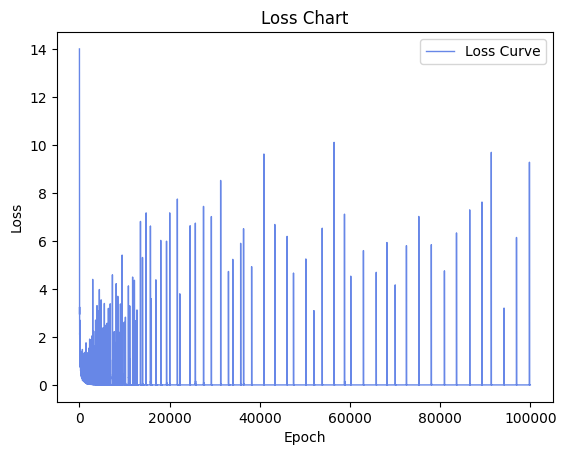

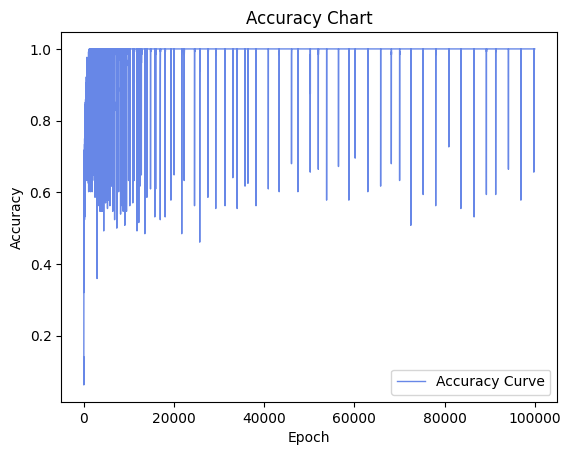

In [7]:
length = 5
train(length)

Step:  0 Loss:  15.132143020629883 Accuracy:  0.0859375
Step:  2000 Loss:  4.471063137054443 Accuracy:  0.1953125
Step:  4000 Loss:  2.3331708908081055 Accuracy:  0.1640625
Step:  6000 Loss:  1.9909831285476685 Accuracy:  0.2109375
Step:  8000 Loss:  1.8964349031448364 Accuracy:  0.2734375
Step:  10000 Loss:  1.6757597923278809 Accuracy:  0.328125
Step:  12000 Loss:  1.6276062726974487 Accuracy:  0.328125
Step:  14000 Loss:  1.357082724571228 Accuracy:  0.359375
Step:  16000 Loss:  1.3839432001113892 Accuracy:  0.328125
Step:  18000 Loss:  1.2702834606170654 Accuracy:  0.40625
Step:  20000 Loss:  1.1818761825561523 Accuracy:  0.4453125
Step:  22000 Loss:  1.043471097946167 Accuracy:  0.5078125
Step:  24000 Loss:  1.1620343923568726 Accuracy:  0.4765625
Step:  26000 Loss:  0.8489428758621216 Accuracy:  0.59375
Step:  28000 Loss:  0.8540772795677185 Accuracy:  0.5703125
Step:  30000 Loss:  0.9232025742530823 Accuracy:  0.625
Step:  32000 Loss:  0.8309270739555359 Accuracy:  0.640625
Step

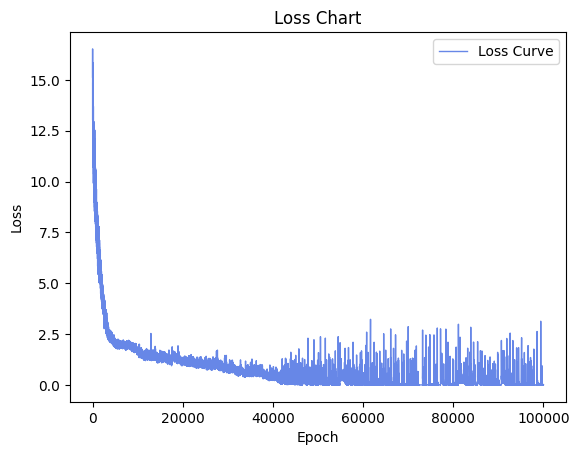

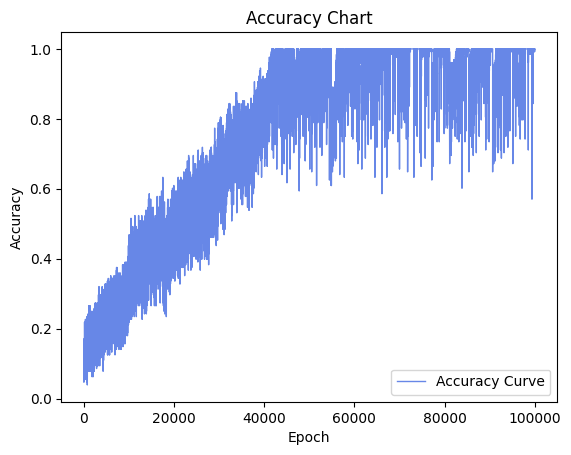

In [8]:
length = 10
train(length)

Step:  0 Loss:  15.176674842834473 Accuracy:  0.1171875
Step:  2000 Loss:  5.657275676727295 Accuracy:  0.046875
Step:  4000 Loss:  2.7474279403686523 Accuracy:  0.1171875
Step:  6000 Loss:  2.390328884124756 Accuracy:  0.0859375
Step:  8000 Loss:  2.3189785480499268 Accuracy:  0.0859375
Step:  10000 Loss:  2.254446029663086 Accuracy:  0.140625
Step:  12000 Loss:  2.301809549331665 Accuracy:  0.1171875
Step:  14000 Loss:  2.3070576190948486 Accuracy:  0.125
Step:  16000 Loss:  2.2830018997192383 Accuracy:  0.1484375
Step:  18000 Loss:  2.326813220977783 Accuracy:  0.09375
Step:  20000 Loss:  2.2998697757720947 Accuracy:  0.09375
Step:  22000 Loss:  2.3004891872406006 Accuracy:  0.1328125
Step:  24000 Loss:  2.3328700065612793 Accuracy:  0.0703125
Step:  26000 Loss:  2.2896499633789062 Accuracy:  0.1328125
Step:  28000 Loss:  2.2434630393981934 Accuracy:  0.1640625
Step:  30000 Loss:  2.3265905380249023 Accuracy:  0.1171875
Step:  32000 Loss:  2.3068854808807373 Accuracy:  0.109375
Step

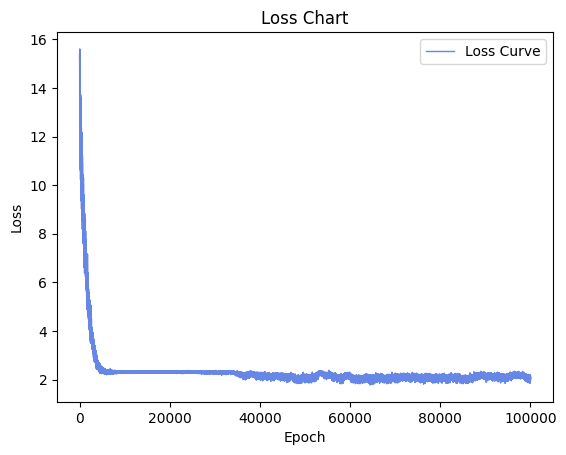

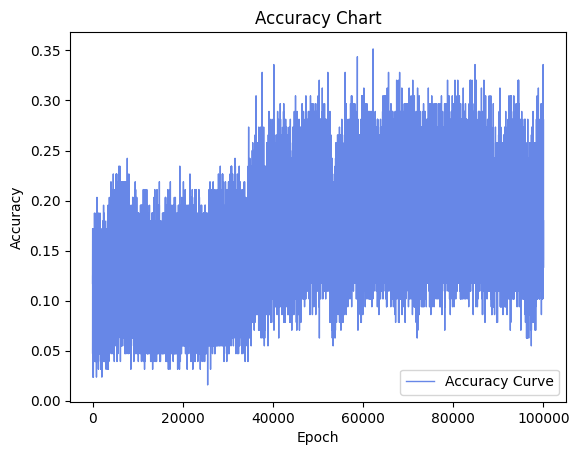

In [9]:
length = 15
train(length)

Step:  0 Loss:  14.70294189453125 Accuracy:  0.1171875
Step:  2000 Loss:  5.732685565948486 Accuracy:  0.109375
Step:  4000 Loss:  2.510740280151367 Accuracy:  0.0859375
Step:  6000 Loss:  2.2793822288513184 Accuracy:  0.140625
Step:  8000 Loss:  2.321228265762329 Accuracy:  0.078125
Step:  10000 Loss:  2.3189098834991455 Accuracy:  0.109375
Step:  12000 Loss:  2.297804117202759 Accuracy:  0.15625
Step:  14000 Loss:  2.3003978729248047 Accuracy:  0.0859375
Step:  16000 Loss:  2.3024404048919678 Accuracy:  0.125
Step:  18000 Loss:  2.315812110900879 Accuracy:  0.0703125
Step:  20000 Loss:  2.277879238128662 Accuracy:  0.09375
Step:  22000 Loss:  2.2984583377838135 Accuracy:  0.1484375
Step:  24000 Loss:  2.324949264526367 Accuracy:  0.0703125
Step:  26000 Loss:  2.3160276412963867 Accuracy:  0.140625
Step:  28000 Loss:  2.3244330883026123 Accuracy:  0.0703125
Step:  30000 Loss:  2.3145341873168945 Accuracy:  0.0859375
Step:  32000 Loss:  2.315269947052002 Accuracy:  0.0703125
Step:  340

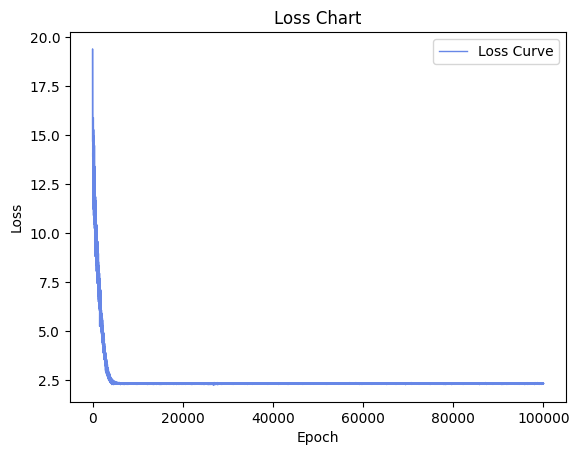

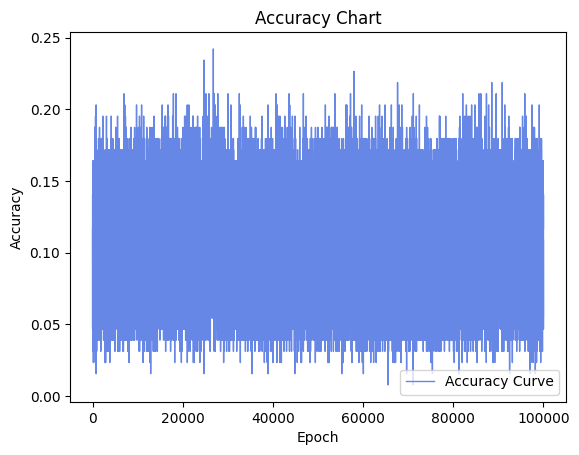

In [10]:
length = 20
train(length)